In [1]:
import beam_dynamics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 7

MCFM_beam = beam_dynamics.MCFMBeam(v=27.78, L=36, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=1.33189, N=N, num_t=1000, P0=618049.62 , num_x=1000)
MHFM_beam = beam_dynamics.MHFMBeam(v=27.78, L=36, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=1.33189, N=N, num_t=1000, P0=618049.62, num_x=1000)
MMM_beam = beam_dynamics.MMMBeam(v=27.78, L=36, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=1.33189, N=N, num_t=1000, M=618049.62 / 9.81, beta=0.25, Gamma=0.50)

# MCFM.animate_beam(MCFM_beam)
# MHFM.animate_beam(MHFM_beam)
;

''

Time for MCFM_beam.calculate_midpoint_results: 0.344985 seconds
Time for MHFM_beam.calculate_midpoint_results: 0.823900 seconds
Time for MMM_beam.calculate_midpoint_results: 0.345439 seconds


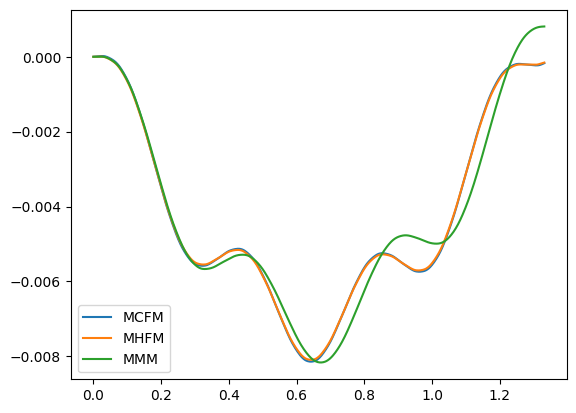

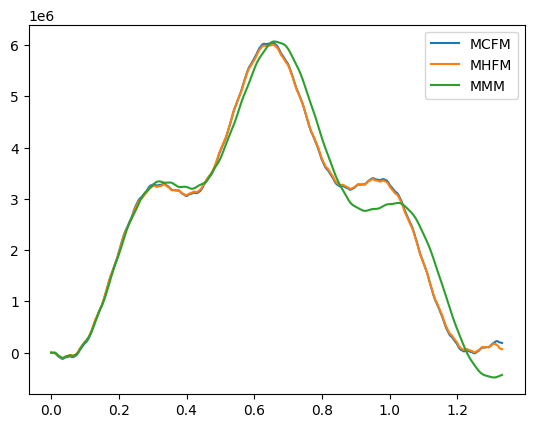

In [3]:
import time

start_time = time.time()
w_vals_MCFM, M_vals_MCFM = MCFM_beam.calculate_midpoint_results()
print(f"Time for MCFM_beam.calculate_midpoint_results: {time.time() - start_time:.6f} seconds")

start_time = time.time()
w_vals_MHFM, M_vals_MHFM = MHFM_beam.calculate_midpoint_results()
print(f"Time for MHFM_beam.calculate_midpoint_results: {time.time() - start_time:.6f} seconds")

start_time = time.time()
w_vals_MMM, M_vals_MMM = MMM_beam.calculate_midpoint_results(do_moment=True)
print(f"Time for MMM_beam.calculate_midpoint_results: {time.time() - start_time:.6f} seconds")

plt.plot(MCFM_beam.t_vals, w_vals_MCFM, label='MCFM')
plt.plot(MHFM_beam.t_vals, w_vals_MHFM, label='MHFM')
plt.plot(MMM_beam.t_vals, w_vals_MMM, label='MMM')
plt.legend()

plt.figure()
plt.plot(MCFM_beam.t_vals, M_vals_MCFM, label='MCFM')
plt.plot(MHFM_beam.t_vals, M_vals_MHFM, label='MHFM')
plt.plot(MMM_beam.t_vals, M_vals_MMM, label='MMM')
plt.legend()



In [4]:
# print("mean difference", np.mean(abs(w_vals_MCFM - w_vals_MHFM)))

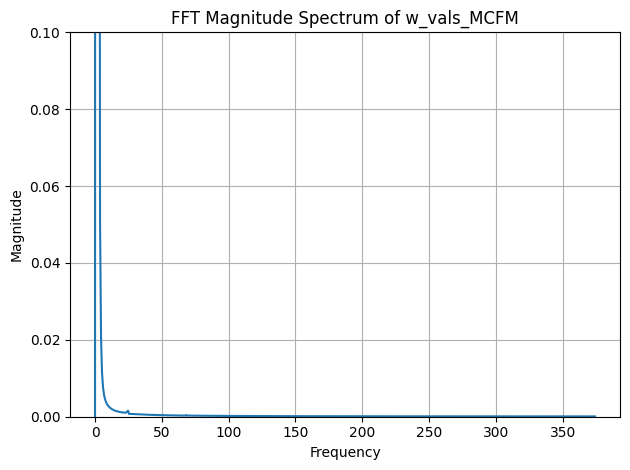

In [5]:
fft_vals = np.fft.fft(w_vals_MCFM - np.mean(w_vals_MCFM))

length = len(w_vals_MCFM)
freqs = np.fft.fftfreq(length, d=MCFM_beam.t_vals[1] - MCFM_beam.t_vals[0])

# Magnitude spectrum
magnitude = np.abs(fft_vals)

# Plot only the positive half of the spectrum
half = length // 2
plt.plot(freqs[:half], magnitude[:half])
plt.title("FFT Magnitude Spectrum of w_vals_MCFM")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.ylim(0, 0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
from scipy.signal import find_peaks

# Assume `magnitude` is the FFT magnitude spectrum
# Optional: take only the positive half of the spectrum
half_N = len(magnitude) // 2
magnitude_half = magnitude[:half_N]
freqs_half = freqs[:half_N]

# Detect peaks — tune `height`, `prominence`, or `distance` as needed
peaks, properties = find_peaks(magnitude_half, prominence=1e-4)

# Get the corresponding frequencies
peak_freqs = freqs_half[peaks]
peak_mags = magnitude_half[peaks]

# Print or sort
for f, m in sorted(zip(peak_freqs, peak_mags), key=lambda x: -x[1]):
    print(f"Found Frequency: {f:.3f}, Magnitude: {m:.4f}")

ns = np.arange(1, N + 1)
Theoretical_omegas = MCFM_beam.get_omega_n(ns)
print("Theoretical Frequencies: ", Theoretical_omegas / 2 / np.pi)

Found Frequency: 0.750, Magnitude: 1.6752
Found Frequency: 24.752, Magnitude: 0.0016
Found Frequency: 68.256, Magnitude: 0.0004
Theoretical Frequencies:  [  2.72767103  10.9106841   24.54903923  43.64273642  68.19177565
  98.19615693 133.65588027]
